# Udacity Data Scienctist Nano Degree Project 1

jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

## TOC: <a class="anchor" id="toc"></a>
* [Project Overview](#overview-bullet)
* [Dataset](#dataset-bullet)
* [Questions](#questions-bullet)
* [Imports](#imports-bullet)
* [Common Functions](#common-bullet)
* [Load Data](#load-bullet)
* [Understand Data](#understand-bullet)

## Project Overview <a class="anchor" id="overview-bullet"></a>
For [Udacity Data Scientist Nano Degree](https://www.udacity.com/course/data-scientist-nanodegree--nd025) project 1 you pick a dataset and using your dataset you choose 3 questions you aspire to answer from the data.

## Dataset <a class="anchor" id="dataset-bullet"></a>   
[TOC](#toc)   



## Questions  <a class="anchor" id="questions-bullet"></a>   
[TOC](#toc)   

understand differences in type of data being used and tools/alg being used   
does this vary by:  
salary  
gender  
age  
country   
level of school  
role 
size of company



What is your age (# years)?    
What is your gender? - Selected Choice    
In which country do you currently reside?   
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?    
Select the title most similar to your current role (or most recent title if retired): - Selected Choice   
What is the size of the company where you are employed?    
Approximately how many individuals are responsible for data science workloads at your place of business?    
Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice   
What is your current yearly compensation (approximate $USD)?     
Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?   
Does your current employer incorporate machine learning methods into their business?    
Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice    
On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice 
What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice   
How long have you been writing code to analyze data (at work or at school)?    
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice    
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice    
What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice     
What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice  
Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice  

Have you ever used a TPU (tensor processing unit)?    
For how many years have you used machine learning methods?   
Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice    
Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice  
Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice    
Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice   
Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice    
Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice    
Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice    
Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice   
Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice    




Which types of data do you currently interact with most often at work or school? (Select all that apply) - Selected Choice    
What is the type of data that you currently interact with most often at work or school? - Selected Choice    
Do you consider yourself to be a data scientist?    





Needs more refinement.  Just a rough list at this point.  


Possible outline:  


## Imports  <a class="anchor" id="imports-bullet"></a>   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Common functions  <a class="anchor" id="common-bullet"></a>   
[TOC](#toc)

In [2]:
def unique_values_info(df):
    number_unique_vals = []
    percent_unique_vals = []
    for col_name in df.columns.tolist():
        number_unique_vals.append(len(df[col_name].unique()))
        percent_unique_vals.append(round(((len(df[col_name].unique())/df.shape[0])*100),2))
    return number_unique_vals, percent_unique_vals

In [3]:
def data_range_info(df):
    col_data_range = []
    col_data_range_count = []
    for col_name, col_dtype in zip(df.columns.tolist(), df.dtypes.tolist()):
        if col_dtype in ['int64', 'float64', 'datetime64[ns]']:
            col_data_range.append([df[col_name].min(), df[col_name].max()])
            col_data_range_count.append([])
        else:
            #col_data_range.append(df[col_name].unique().tolist())
            col_data_range.append(df[col_name].value_counts().index.tolist())
            col_data_range_count.append(df[col_name].value_counts().tolist())
    return col_data_range, col_data_range_count

In [4]:
def get_dataframe_info(df):
    info = {}
    
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    num_nans = df.isnull().sum(axis=0).sum()
    
    info['name'] = df.columns.tolist()
    info['dtype'] = df.dtypes.tolist()
    nans = df.isnull().sum(axis=0).tolist()
    info['num_nans'] = nans
    pct_nans = [round((nan/df.shape[0])*100,2) for nan in nans]
    info['pct_nans'] = pct_nans
    
    col_data_range, col_data_range_count = data_range_info(df)
    info['data_range'] = col_data_range
    info['data_range_count'] = col_data_range_count
    
    col_number_unique_vals, col_percent_unique_vals = unique_values_info(df)
    info['num_unique'] = col_number_unique_vals
    info['pct_unique'] = col_percent_unique_vals
    
    df_info = pd.DataFrame(info) 
    df_info.set_index('name', inplace = True) 
        
    return num_rows, num_cols, num_nans, df_info

In [5]:
def convert_string_to_number(df, columns):
    for column in columns:
        df[column] = df[column].str.replace(r'\D+', '')
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

## Load the data

In [6]:
df_2018 = pd.read_csv('~/data/kaggle-survey/kaggle-survey-2018/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
df_2019 = pd.read_csv('~/data/kaggle-survey/kaggle-survey-2019/multiple_choice_responses.csv', encoding="ISO-8859-1", low_memory=False)

## Data prep

In [7]:
df_2018.columns = df_2018.iloc[0]
df_2018 = df_2018.drop([0])

df_2019.columns = df_2019.iloc[0]
df_2019 = df_2019.drop([0])

In [8]:
df_2018['In which country do you currently reside?'] = df_2018['In which country do you currently reside?'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', regex=False)
df_2018['In which country do you currently reside?'] = df_2018['In which country do you currently reside?'].str.replace('United States of America', 'United States', regex=False)

df_2019['In which country do you currently reside?'] = df_2019['In which country do you currently reside?'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', regex=False)
df_2019['In which country do you currently reside?'] = df_2019['In which country do you currently reside?'].str.replace('United States of America' , 'United States', regex=False)

In [9]:
df_2018['For how many years have you used machine learning methods (at work or in school)?'] = df_2018['For how many years have you used machine learning methods (at work or in school)?'].str.replace('I have never studied machine learning but plan to learn in the future', 'Never but plan to', regex=False)
df_2018['For how many years have you used machine learning methods (at work or in school)?'] = df_2018['For how many years have you used machine learning methods (at work or in school)?'].str.replace('I have never studied machine learning and I do not plan to', 'Never do not plan to', regex=False)

In [10]:
df_2018['What is your current yearly compensation (approximate $USD)?'] = df_2018['What is your current yearly compensation (approximate $USD)?'].str.replace('I do not wish to disclose my approximate yearly compensation', 'Did not disclose', regex=False)

In [11]:
df_2018['CompensationRange'] = df_2018['What is your current yearly compensation (approximate $USD)?']
df_2018.loc[(df_2018['CompensationRange'] == '0-10,000'),'CompensationRange'] = '0-10k'

df_2018.loc[(df_2018['CompensationRange'] == '10-20,000'),'CompensationRange'] = '10-50k'
df_2018.loc[(df_2018['CompensationRange'] == '20-30,000'),'CompensationRange'] = '10-50k'
df_2018.loc[(df_2018['CompensationRange'] == '30-40,000'),'CompensationRange'] = '10-50k'
df_2018.loc[(df_2018['CompensationRange'] == '40-50,000'),'CompensationRange'] = '10-50k'

df_2018.loc[(df_2018['CompensationRange'] == '50-60,000'),'CompensationRange'] = '50-100k'
df_2018.loc[(df_2018['CompensationRange'] == '60-70,000'),'CompensationRange'] = '50-100k'
df_2018.loc[(df_2018['CompensationRange'] == '70-80,000'),'CompensationRange'] = '50-100k'
df_2018.loc[(df_2018['CompensationRange'] == '80-90,000'),'CompensationRange'] = '50-100k'
df_2018.loc[(df_2018['CompensationRange'] == '90-100,000'),'CompensationRange'] = '50-100k'

df_2018.loc[(df_2018['CompensationRange'] == '100-125,000'),'CompensationRange'] = '100-200k'
df_2018.loc[(df_2018['CompensationRange'] == '125-150,000'),'CompensationRange'] = '100-200k'
df_2018.loc[(df_2018['CompensationRange'] == '150-200,000'),'CompensationRange'] = '100-200k'

df_2018.loc[(df_2018['CompensationRange'] == '200-250,000'),'CompensationRange'] = '200-300k'
df_2018.loc[(df_2018['CompensationRange'] == '250-300,000'),'CompensationRange'] = '200-300k'

df_2018.loc[(df_2018['CompensationRange'] == '300-400,000'),'CompensationRange'] = '300-500k'
df_2018.loc[(df_2018['CompensationRange'] == '400-500,000'),'CompensationRange'] = '300-500k'

df_2018.loc[(df_2018['CompensationRange'] == '500,000+'),'CompensationRange'] = '500k+'

In [12]:
df_2018['CompensationRange'] = df_2018['CompensationRange'].replace('Did not disclose', np.nan)

In [13]:
df_2019['CompensationRange'] = df_2019['What is your current yearly compensation (approximate $USD)?']
df_2019.loc[(df_2019['CompensationRange'] == '$0-999'),'CompensationRange'] = '0-10k'
df_2019.loc[(df_2019['CompensationRange'] == '1,000-1,999'),'CompensationRange'] = '0-10k'
df_2019.loc[(df_2019['CompensationRange'] == '2,000-2,999'),'CompensationRange'] = '0-10k'
df_2019.loc[(df_2019['CompensationRange'] == '3,000-3,999'),'CompensationRange'] = '0-10k'
df_2019.loc[(df_2019['CompensationRange'] == '4,000-4,999'),'CompensationRange'] = '0-10k'
df_2019.loc[(df_2019['CompensationRange'] == '5,000-7,499'),'CompensationRange'] = '0-10k'
df_2019.loc[(df_2019['CompensationRange'] == '7,500-9,999'),'CompensationRange'] = '0-10k'

df_2019.loc[(df_2019['CompensationRange'] == '10,000-14,999'),'CompensationRange'] = '10-50k'
df_2019.loc[(df_2019['CompensationRange'] == '15,000-19,999'),'CompensationRange'] = '10-50k'
df_2019.loc[(df_2019['CompensationRange'] == '20,000-24,999'),'CompensationRange'] = '10-50k'
df_2019.loc[(df_2019['CompensationRange'] == '25,000-29,999'),'CompensationRange'] = '10-50k'
df_2019.loc[(df_2019['CompensationRange'] == '30,000-39,999'),'CompensationRange'] = '10-50k'
df_2019.loc[(df_2019['CompensationRange'] == '40,000-49,999'),'CompensationRange'] = '10-50k'

df_2019.loc[(df_2019['CompensationRange'] == '50,000-59,999'),'CompensationRange'] = '50-100k'
df_2019.loc[(df_2019['CompensationRange'] == '60,000-69,999'),'CompensationRange'] = '50-100k'
df_2019.loc[(df_2019['CompensationRange'] == '70,000-79,999'),'CompensationRange'] = '50-100k'
df_2019.loc[(df_2019['CompensationRange'] == '80,000-89,999'),'CompensationRange'] = '50-100k'
df_2019.loc[(df_2019['CompensationRange'] == '90,000-99,999'),'CompensationRange'] = '50-100k'

df_2019.loc[(df_2019['CompensationRange'] == '100,000-124,999'),'CompensationRange'] = '100-200k'
df_2019.loc[(df_2019['CompensationRange'] == '125,000-149,999'),'CompensationRange'] = '100-200k'
df_2019.loc[(df_2019['CompensationRange'] == '150,000-199,999'),'CompensationRange'] = '100-200k'

df_2019.loc[(df_2019['CompensationRange'] == '200,000-249,999'),'CompensationRange'] = '200-300k'
df_2019.loc[(df_2019['CompensationRange'] == '250,000-299,999'),'CompensationRange'] = '200-300k'

df_2019.loc[(df_2019['CompensationRange'] == '300,000-500,000'),'CompensationRange'] = '300-500k'

df_2019.loc[(df_2019['CompensationRange'] == '> $500,000'),'CompensationRange'] = '500k+'

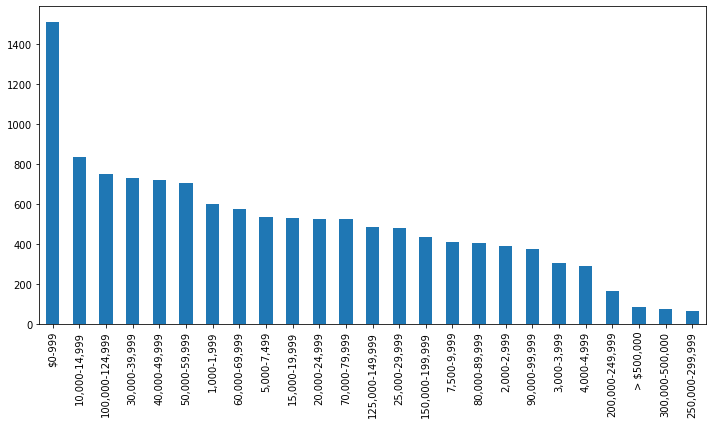

In [15]:
df_2019['What is your current yearly compensation (approximate $USD)?'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

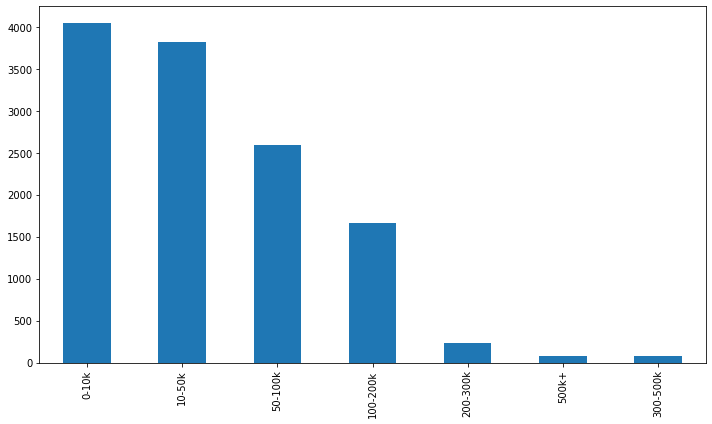

In [16]:
df_2019['CompensationRange'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

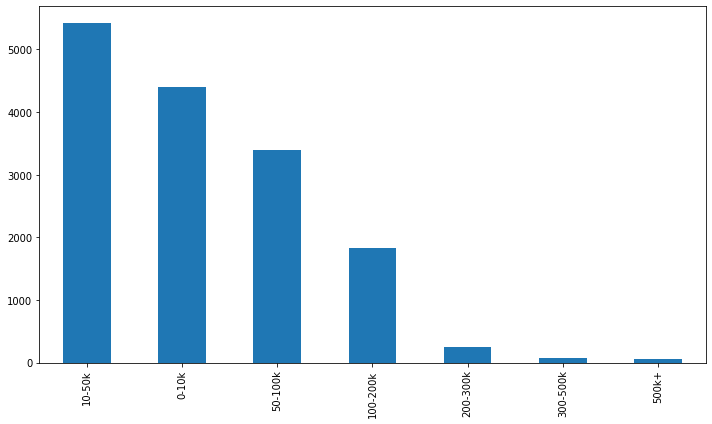

In [17]:
df_2018['CompensationRange'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

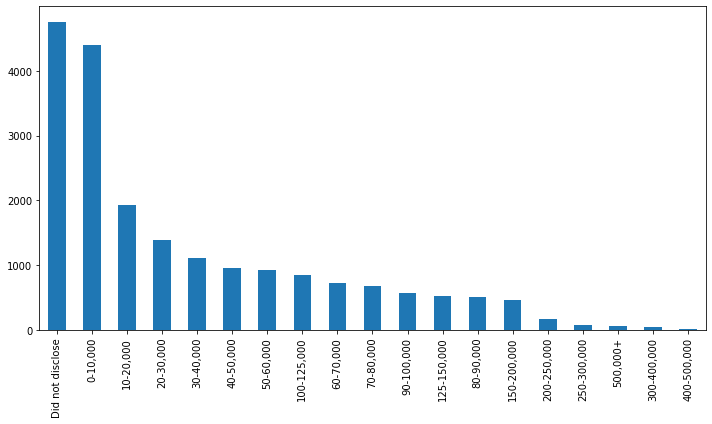

In [18]:
df_2018['What is your current yearly compensation (approximate $USD)?'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

## Number of respondents

In [20]:
data = {'year':['2018','2019'],
        'number of respondents':[len(df_2018), len(df_2019)]}

df_respondents = pd.DataFrame(data=data)

In [21]:
df_respondents.head()

,year,number of respondents
0,2018,23859
1,2019,19717


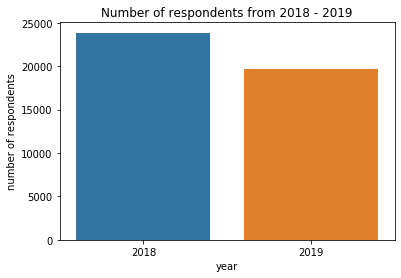

In [23]:
sns.barplot(x='year', y='number of respondents', ci=None, data=df_respondents)
plt.title('Number of respondents from 2018 - 2019')
plt.show()

## Gender

In [24]:
gender_2018 = df_2018['What is your gender? - Selected Choice'].value_counts(sort=True)
gender_2019 = df_2019['What is your gender? - Selected Choice'].value_counts(sort=True)

In [26]:
gender_2018.head()

Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: What is your gender? - Selected Choice, dtype: int64

In [27]:
gender_2019.head()

Male                       16138
Female                      3212
Prefer not to say            318
Prefer to self-describe       49
Name: What is your gender? - Selected Choice, dtype: int64

In [29]:
data = {'year':['2018','2019'],
        'male':[gender_2018[0], gender_2019[0]],
        'female':[gender_2018[1], gender_2019[1]],
        'private_selfdescribe': [gender_2018[2]+gender_2018[3], 
                                 gender_2019[2]+gender_2019[3]]}

df_gender = pd.DataFrame(data=data)

In [30]:
df_gender.head()

,year,male,female,private_selfdescribe
0,2018,19430,4010,419
1,2019,16138,3212,367


In [31]:
print(df_gender.male/df_gender.female)

0    4.845387
1    5.024284
dtype: float64


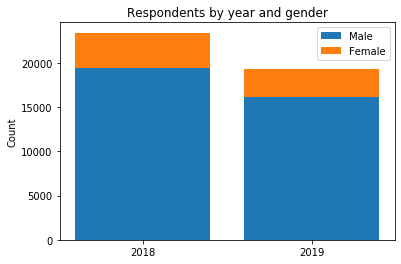

In [32]:
p1 = plt.bar(df_gender.year, df_gender.male)
p2 = plt.bar(df_gender.year, df_gender.female, bottom=df_gender.male)

plt.ylabel('Count')
plt.title('Respondents by year and gender')
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.show()

In [230]:
group = df_mc_2018['What is your gender? - Selected Choice'].groupby(df_mc_2018['CompensationRange'])
# average_salary = group.mean().sort_values(ascending=False)


ValueError: Neither the `x` nor `y` variable appears to be numeric.

## Country

In [33]:
country_2018 = df_2018['In which country do you currently reside?'].value_counts(sort=True)[:10]
country_2019 = df_2019['In which country do you currently reside?'].value_counts(sort=True)[:10]

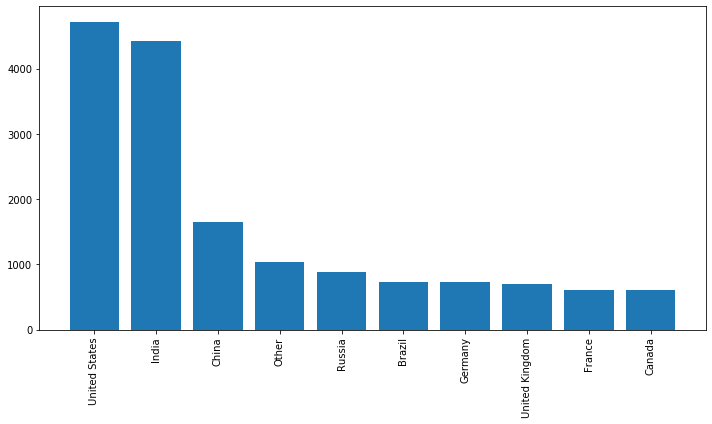

In [35]:
fig, ax = plt.subplots(figsize = (10,6))
bar1 = ax.bar(country_2018.index, country_2018)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

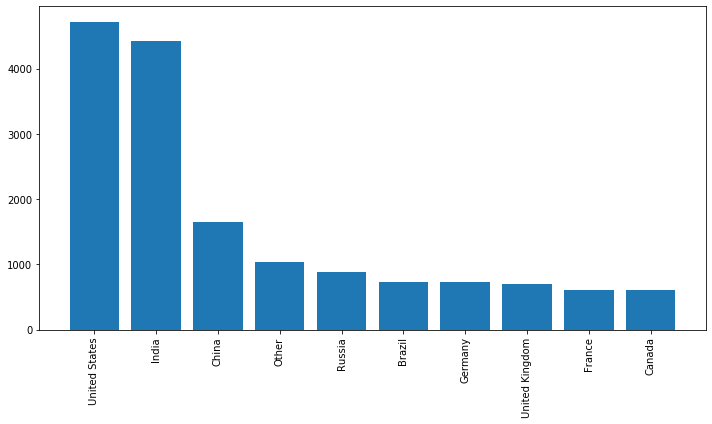

In [36]:
fig, ax = plt.subplots(figsize = (10,6))
bar1 = ax.bar(country_2018.index, country_2018)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

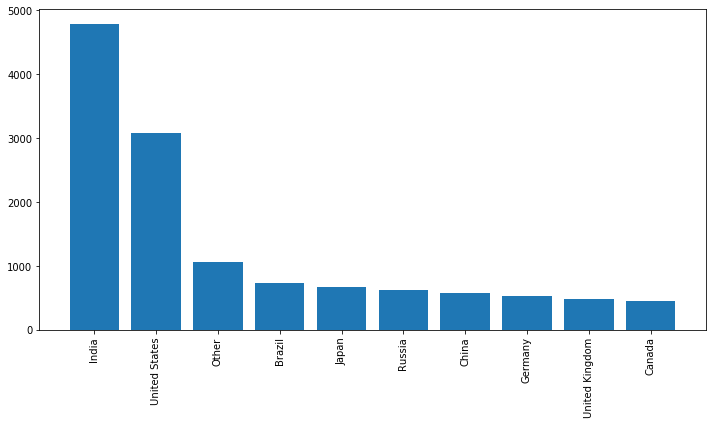

In [37]:
fig, ax = plt.subplots(figsize = (10,6))
bar1 = ax.bar(country_2019.index, country_2019)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Age

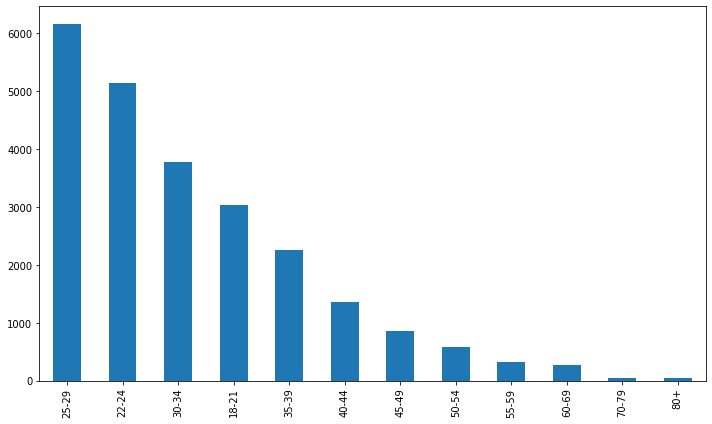

In [38]:
df_2018['What is your age (# years)?'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

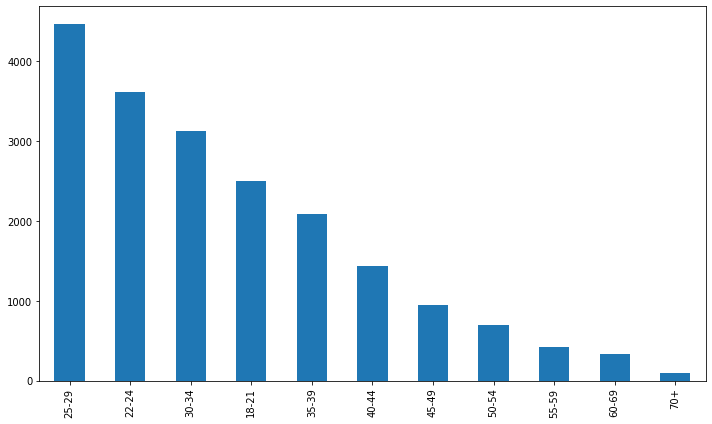

In [39]:
df_2019['What is your age (# years)?'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

## Years using ML

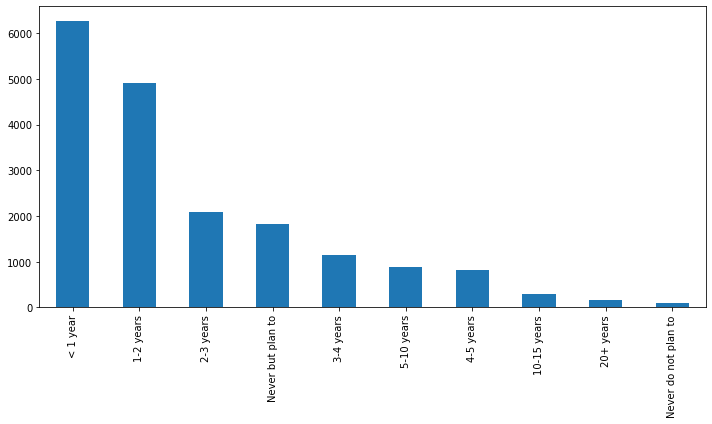

In [40]:
df_2018['For how many years have you used machine learning methods (at work or in school)?'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

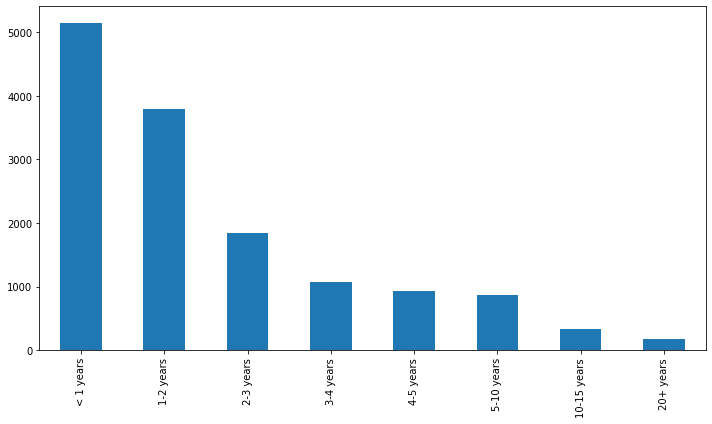

In [41]:
df_2019['For how many years have you used machine learning methods?'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

## Compensation

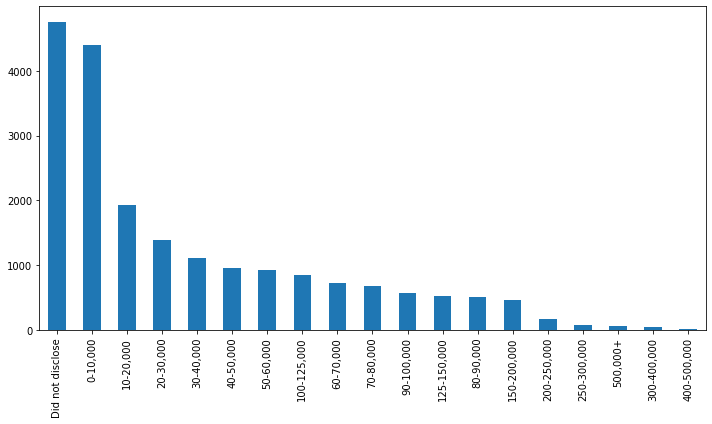

In [42]:
df_2018['What is your current yearly compensation (approximate $USD)?'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

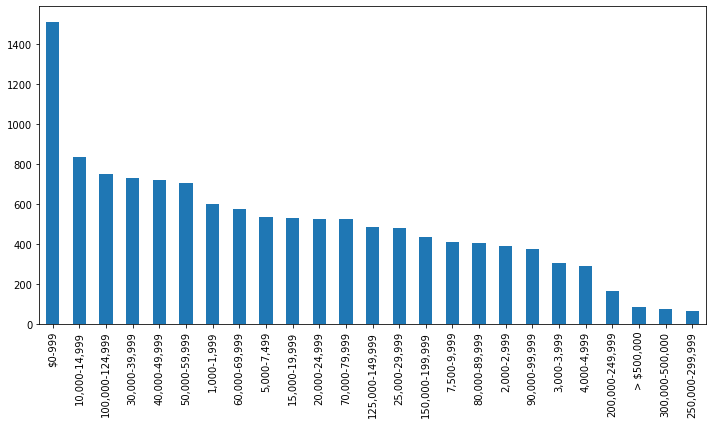

In [43]:
df_2019['What is your current yearly compensation (approximate $USD)?'].value_counts(sort=True).plot(kind='bar', figsize=(10, 6))
plt.tight_layout()
plt.show()

In [144]:
df_mc_2019['What is your current yearly compensation (approximate $USD)?'].value_counts

<bound method IndexOpsMixin.value_counts of 1          30,000-39,999
2            5,000-7,499
3                    NaN
4        250,000-299,999
5            4,000-4,999
              ...       
19713                NaN
19714             $0-999
19715                NaN
19716        1,000-1,999
19717      60,000-69,999
Name: What is your current yearly compensation (approximate $USD)?, Length: 19717, dtype: object>

What does the data show that separates the highest paid people?   
<100K   
100K   
200K  
300K   
400K   
500K+   

Look at:  
age   
gender  
country   
school/education    
experience   
title of current role   
tools   
programming languages   
viz tools   
databases   
cloud services   


## ML tools

In [ ]:
Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice

In [142]:
for index, name in enumerate(df_mc_2018.columns):
    print(str(index) + ': ' + name)
    print('')

0: Duration (in seconds)

1: What is your gender? - Selected Choice

2: What is your gender? - Prefer to self-describe - Text

3: What is your age (# years)?

4: In which country do you currently reside?

5: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

6: Which best describes your undergraduate major? - Selected Choice

7: Select the title most similar to your current role (or most recent title if retired): - Selected Choice

8: Select the title most similar to your current role (or most recent title if retired): - Other - Text

9: In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice

10: In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text

11: How many years of experience do you have in your current role?

12: What is your current yearly compensation (approximate $USD)?

13: Does your current employer in

In [143]:
for index, name in enumerate(df_mc_2019.columns):
    print(str(index) + ': ' + name)
    print('')

0: Duration (in seconds)

1: What is your age (# years)?

2: What is your gender? - Selected Choice

3: What is your gender? - Prefer to self-describe - Text

4: In which country do you currently reside?

5: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

6: Select the title most similar to your current role (or most recent title if retired): - Selected Choice

7: Select the title most similar to your current role (or most recent title if retired): - Other - Text

8: What is the size of the company where you are employed?

9: Approximately how many individuals are responsible for data science workloads at your place of business?

10: Does your current employer incorporate machine learning methods into their business?

11: Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions

12: Select a